# Assignment 11: Visualizations
Tierney O'Sullivan  
November 20, 2023

In [3]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [5]:
covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart  
   
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.

## Visualization 1

Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should  
-Show cases over time  
-Have all counties plotted in a background color (something like grey)  
-Have a single county plotted in a contrasting color (something not grey)  
-Have well formatted dates as the X axis  

In [6]:
# change df to long format

df_long = pd.melt(covid_df,
        id_vars = ['iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'],
        var_name = 'date',
        value_name = 'confirmed_cases')

In [7]:
df_long.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,confirmed_cases
0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


In [8]:
# get only Utah counties
df_utah = df_long[df_long['Province_State'] == "Utah"]
df_utah.head()


,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,confirmed_cases
2956,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",1/22/20,0
2957,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",1/22/20,0
2958,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",1/22/20,0
2959,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",1/22/20,0
2960,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",1/22/20,0


In [9]:
# change date to datetime
df_utah['date']= pd.to_datetime(df_utah['date'])
# check to see if it's changed to a date time object
df_utah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42291 entries, 2956 to 3819556
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   iso2             42291 non-null  object        
 1   iso3             42291 non-null  object        
 2   code3            42291 non-null  int64         
 3   FIPS             35433 non-null  float64       
 4   Admin2           42291 non-null  object        
 5   Province_State   42291 non-null  object        
 6   Country_Region   42291 non-null  object        
 7   Lat              42291 non-null  float64       
 8   Long_            42291 non-null  float64       
 9   Combined_Key     42291 non-null  object        
 10  date             42291 non-null  datetime64[ns]
 11  confirmed_cases  42291 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.2+ MB


/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/3032640060.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_utah['date']= pd.to_datetime(df_utah['date'])
/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/3032640060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utah['date']= pd.to_datetime(df_utah['date'])


/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

Text(0.5, 0, 'Date')

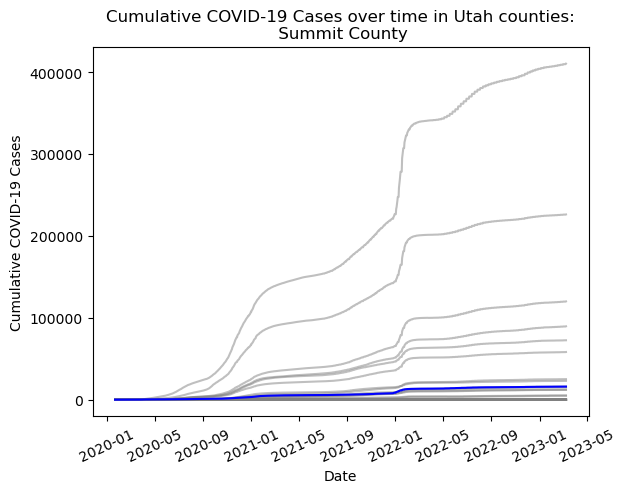

In [10]:
# plot cases over time by county
# x axis = date, y  axix = cumulative cases
sns.lineplot(data = df_utah, x = 'date', y = 'confirmed_cases', 
             # create a new line for each Admin2
             units = 'Admin2', estimator = None, color = 'gray',
             # make transparency < 1
             alpha = 0.5) 

# add a colored line on the plot for a specific county of interest, here we use Summit County
sns.lineplot(data = df_utah[df_utah['Admin2'] == 'Summit'], x = 'date', y = 'confirmed_cases', 
             units = 'Admin2', estimator = None, color = 'blue',
             # make transparency set to 1
             alpha = 1) 
# change axis of date labels set to 25 to view them more easily
plt.xticks(rotation = 25)
plt.title('Cumulative COVID-19 Cases over time in Utah counties:\n Summit County')
plt.ylabel('Cumulative COVID-19 Cases')
plt.xlabel('Date')


## Visualization 2

Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:  
-Have only two counties plotted  
-Highlight the difference between the two comparison counties  
You may use any style of graphic you like as long as it is effective (dense)  
and readable

In [11]:
df_utfl = df_long[df_long['Province_State'].isin(['Utah', 'Florida'])]
df_utfl['date'] =  pd.to_datetime(df_utfl['date'])


df_max = df_utfl[df_utfl['date']== df_utfl['date'].max()]


/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/4263019703.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_utfl['date'] =  pd.to_datetime(df_utfl['date'])
/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/4263019703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utfl['date'] =  pd.to_datetime(df_utfl['date'])


In [12]:
df_utfl_counties = df_utfl[~df_utfl['Admin2'].isin(["Out of FL", "Unassigned", "Out of UT"])]


In [13]:
# get the max date of the time series
counties = df_utfl_counties[df_utfl_counties['date'] == df_utfl_counties['date'].max()]
max_cases = counties.groupby('Province_State').max('confirmed_cases')

In [14]:
# extract the counties that have the most confirmed cases for each state
max_counties = df_utfl[df_utfl['confirmed_cases'].isin(max_cases['confirmed_cases'])]['Combined_Key'].unique()

In [15]:
df_utfl_max = df_utfl[df_utfl['Combined_Key'].isin(max_counties)]

/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

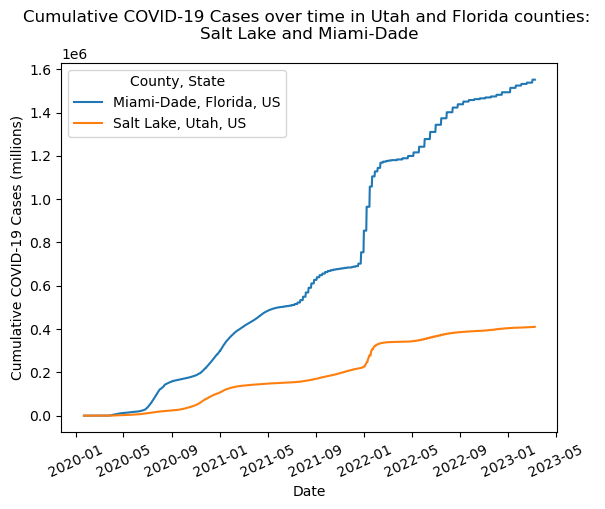

In [16]:
# plot cases over time by county
# x axis = date, y  axix = cumulative cases
sns.lineplot(data = df_utfl_max, x = 'date', y = 'confirmed_cases', 
             # create a new line for each Admin2
             hue = 'Combined_Key') 


# change axis of date labels set to 25 to view them more easily
plt.xticks(rotation = 25)
plt.title('Cumulative COVID-19 Cases over time in Utah and Florida counties: \nSalt Lake and Miami-Dade')
plt.ylabel('Cumulative COVID-19 Cases (millions)')
plt.xlabel('Date')
plt.legend(title = "County, State")

## Visualization 3
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:  
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)  
-Use color to contrast the two series being plotted  
-Have well formatted dates as the X axis  

In [17]:
# select a single county: Miami Dade

df_miami = df_utfl_max[df_utfl_max['Admin2']=="Miami-Dade"]

# create a new column that calculates new daily confirmed cases
df_miami['new_confirmed_cases'] = df_miami['confirmed_cases'].diff()
df_miami.head()


/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/3134404770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miami['new_confirmed_cases'] = df_miami['confirmed_cases'].diff()


,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,confirmed_cases,new_confirmed_cases
384,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,"Miami-Dade, Florida, US",2020-01-22,0,NaN
3726,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,"Miami-Dade, Florida, US",2020-01-23,0,0.0
7068,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,"Miami-Dade, Florida, US",2020-01-24,0,0.0
10410,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,"Miami-Dade, Florida, US",2020-01-25,0,0.0
13752,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,"Miami-Dade, Florida, US",2020-01-26,0,0.0


/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

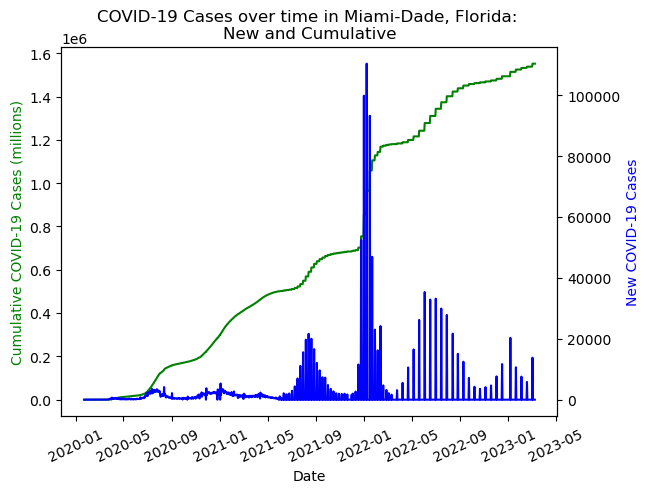

In [18]:
# create a line plot of cumulative cases and use green
ax1 = sns.lineplot(data=df_miami, y = 'confirmed_cases', x = 'date', color="g")
# create a second y axis that is based on the same x axis
ax2 = ax1.twinx()
# for the second y axis, use new confirmed cases
sns.lineplot(data=df_miami, y = 'new_confirmed_cases', x = 'date', color="b", ax=ax2)

# add title
plt.title('COVID-19 Cases over time in Miami-Dade, Florida: \nNew and Cumulative')
# label axes and match the label text to the line color
ax1.set_ylabel('Cumulative COVID-19 Cases (millions)', color='g')
ax2.set_ylabel("New COVID-19 Cases", color = 'b')
ax1.set_xlabel('Date')
# change axis of date labels set to 25 to view them more easily
ax1.tick_params(axis = 'x', rotation = 25)

## Visualization 4

Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)  
The graphic should:  
-Have a single column delineate a state  
-Have each 'slice' or column compontent represent a county  

In [27]:
df_utah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42291 entries, 2956 to 3819556
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   iso2             42291 non-null  object        
 1   iso3             42291 non-null  object        
 2   code3            42291 non-null  int64         
 3   FIPS             35433 non-null  float64       
 4   Admin2           42291 non-null  object        
 5   Province_State   42291 non-null  object        
 6   Country_Region   42291 non-null  object        
 7   Lat              42291 non-null  float64       
 8   Long_            42291 non-null  float64       
 9   Combined_Key     42291 non-null  object        
 10  date             42291 non-null  datetime64[ns]
 11  confirmed_cases  42291 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 5.2+ MB


In [32]:
# import seaborn objects
import seaborn.objects as so

# use final date of delaware data
df_de = df_long[df_long['Province_State'] == "Delaware"]
df_de.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,confirmed_cases
333,US,USA,840,10001.0,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",1/22/20,0
334,US,USA,840,10003.0,New Castle,Delaware,US,39.579926,-75.640550,"New Castle, Delaware, US",1/22/20,0
335,US,USA,840,80010.0,Out of DE,Delaware,US,0.000000,0.000000,"Out of DE, Delaware, US",1/22/20,0
336,US,USA,840,10005.0,Sussex,Delaware,US,38.661438,-75.390313,"Sussex, Delaware, US",1/22/20,0
337,US,USA,840,90010.0,Unassigned,Delaware,US,0.000000,0.000000,"Unassigned, Delaware, US",1/22/20,0


In [37]:
# change date to datetime 
df_de['date'] = pd.to_datetime(df_de['date'])
# get final date
df_de_final = df_de[df_de['date']== df_de['date'].max()]


/var/folders/k2/06b5b1ss75385l6vbs1v80140000gn/T/ipykernel_48711/3908899945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['date'] = pd.to_datetime(df_de['date'])


/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will 

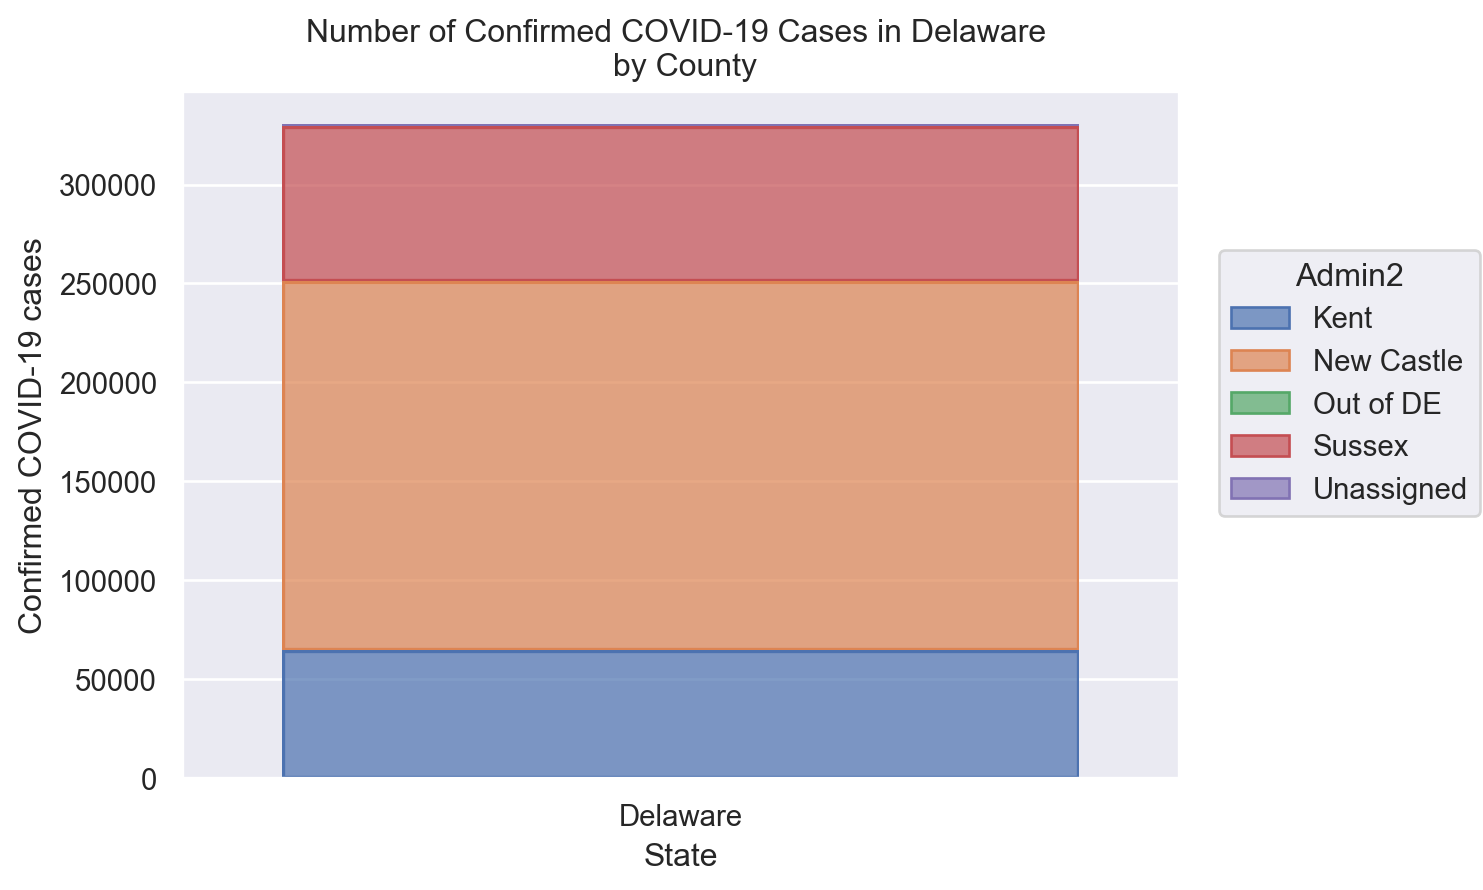

In [38]:

# create a stacked bar chart with color = county 
p = so.Plot(data = df_de_final, x = 'Province_State', y = 'confirmed_cases', color = 'Admin2').add(so.Bar(), so.Stack())

p.label(x = "State", y = "Confirmed COVID-19 cases", title = "Number of Confirmed COVID-19 Cases in Delaware \n by County")